<a href="https://colab.research.google.com/github/samaneh-m/TU-deep-Learning/blob/main/setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
<p style="text-align:left;">Deep Learning Course

<p style="text-align:left;"> Sebastian Konietzny & Lukas Schneider

---
<p style="text-align:center;"><b>Environmental Setup</b></p>


---

**Setup with Google Colab:** Access it via the [Colab website](https://colab.research.google.com/).

- Upload this notebook to Colab.
- Change the runtime type to **GPU**: go to `Runtime > Change runtime type` (in German: `Laufzeit > Laufzeittyp ändern`).
- Run the notebook to connect to the runtime environment.
- ⚠️ **Don’t let the notebook disconnect during training!** This can happen if you close the browser tab or lose your internet connection. Colab also automatically disconnects after 12 hours of runtime. More info on Colab's resource limits is available [here](https://research.google.com/colaboratory/faq.html#resource-limits).

---

**Setup on Your Local Machine:**

- Install a local Python environment (e.g., via [Anaconda](https://www.anaconda.com/download)).
- Open the notebook in an IDE such as [VS Code](https://code.visualstudio.com), [PyCharm](https://www.jetbrains.com/pycharm/), or in [JupyterLab](https://jupyter.org).
- Use your terminal or command line to install the required packages via [pip](https://pip.pypa.io/en/stable/user_guide/) or [conda](https://docs.conda.io/projects/conda/en/stable/user-guide/concepts/installing-with-conda.html):

  1. `torch`, `torchvision` — for training neural networks. Download it from [pytorch.org](https://pytorch.org/). Select the **CUDA** version if you have an Nvidia GPU.
  2. `matplotlib` — for visualizations.
  3. `tqdm` — for displaying training progress.


---

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Activate GPU: Laufzeit --> Laufzeittyp ändern --> T4 GPU

In [2]:
print(torch.__version__)
print(torch.cuda.is_available()) # Should print True

2.6.0+cu124
True


In [10]:
# 1. Hyperparameters
batch_size = 64
learning_rate = 0.01
epochs = 6

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 479kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.25MB/s]

torch.Size([64, 1, 28, 28]) torch.Size([64])


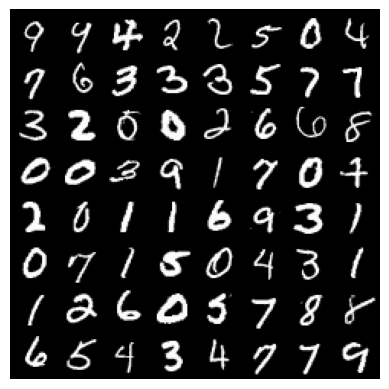

In [4]:
# 2. Data loading
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

x, y = next(iter(train_loader))
print(x.shape, y.shape)

npimg = torchvision.utils.make_grid(x).numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.axis('off')
plt.show()

In [11]:
# 3. Define model, loss and optimizer
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

model = NN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
# 4. Training loop

pbar1 = tqdm(range(epochs), desc="Epochs", position=0)
for epoch in pbar1:
    model.train()
    running_loss = 0.0

    pbar2 = tqdm(train_loader, desc="Batches", position=1)
    for x, y in pbar2:
        # Forward pass
        outputs = model(x)
        loss = criterion(outputs, y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        pbar2.set_description(f"Loss: {loss.item():.4f}")

    pbar1.set_description(f"Loss: {running_loss/len(train_loader):.4f}")


Epochs:   0%|          | 0/6 [00:00<?, ?it/s]

Batches:   0%|          | 0/938 [00:00<?, ?it/s]

Batches:   0%|          | 0/938 [00:00<?, ?it/s]

Batches:   0%|          | 0/938 [00:00<?, ?it/s]

Batches:   0%|          | 0/938 [00:00<?, ?it/s]

Batches:   0%|          | 0/938 [00:00<?, ?it/s]

Batches:   0%|          | 0/938 [00:00<?, ?it/s]

In [13]:
# 5. Test accuracy
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for x, y in test_loader:
        outputs = model(x)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 91.96%
